In [33]:
import pandas as pd
import numpy as np
#import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
#sns.set(color_codes=True)

df = pd.read_csv('veh.csv')

In [34]:
df.head()

,Unnamed: 0,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
1,7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
2,10,19500,2011.0,chevrolet silverado 1500,excellent,8.0,gas,128413.0,automatic,pickup,black,1.0,2018-09-17,38
3,14,12990,2009.0,gmc yukon,excellent,8.0,gas,132285.0,automatic,SUV,black,1.0,2019-01-31,24
4,16,14990,2010.0,ram 1500,excellent,8.0,gas,130725.0,automatic,pickup,red,1.0,2018-12-30,13


In [35]:
df.shape


(14852, 14)

In [36]:
df.dtypes

Unnamed: 0        int64
price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

In [37]:

df.describe()

,Unnamed: 0,price,model_year,cylinders,odometer,is_4wd,days_listed
count,14852.000000,14852.000000,14852.000000,14852.000000,14852.000000,14852.0,14852.000000
mean,25633.686103,15446.921155,2010.052586,6.798950,117713.691287,1.0,39.863520
std,14951.948034,11393.676296,5.790532,1.468353,65610.650451,0.0,28.073348
min,5.000000,1.000000,1965.000000,3.000000,0.000000,1.0,0.000000
25%,12753.250000,6989.500000,2006.000000,6.000000,71597.500000,1.0,19.000000
50%,25996.500000,13500.000000,2011.000000,8.000000,115665.500000,1.0,34.000000
75%,38373.250000,21988.000000,2015.000000,8.000000,158378.000000,1.0,54.000000
max,51515.000000,375000.000000,2019.000000,12.000000,866000.000000,1.0,263.000000


In [38]:
df.columns

Index(['Unnamed: 0', 'price', 'model_year', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

In [39]:
df.isnull().sum() 

Unnamed: 0      0
price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [40]:
df = df.dropna() 

In [41]:
df.isnull().sum() 

Unnamed: 0      0
price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [42]:
df.count()

Unnamed: 0      14852
price           14852
model_year      14852
model           14852
condition       14852
cylinders       14852
fuel            14852
odometer        14852
transmission    14852
type            14852
paint_color     14852
is_4wd          14852
date_posted     14852
days_listed     14852
dtype: int64

In [43]:
df.drop_duplicates(inplace=True)


In [44]:
df.count()


Unnamed: 0      14852
price           14852
model_year      14852
model           14852
condition       14852
cylinders       14852
fuel            14852
odometer        14852
transmission    14852
type            14852
paint_color     14852
is_4wd          14852
date_posted     14852
days_listed     14852
dtype: int64

In [45]:
df['paint_color']

0         black
1         black
2         black
3         black
4           red
          ...  
14847    silver
14848     white
14849     white
14850     white
14851    silver
Name: paint_color, Length: 14852, dtype: object

In [46]:
df['paint_color'].fillna('Unknown', inplace=True)


In [47]:
df.isnull().sum() 


Unnamed: 0      0
price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [48]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [49]:
df.dtypes

Unnamed: 0               int64
price                    int64
model_year             float64
model                   object
condition               object
cylinders              float64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                 float64
date_posted     datetime64[ns]
days_listed              int64
dtype: object

In [50]:
import matplotlib.pyplot as plt
#import seaborn as sns
import plotly.express as px
from scipy import stats
import numpy as np

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'model_year'}>],
       [<Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'odometer'}>,
        <Axes: title={'center': 'is_4wd'}>],
       [<Axes: title={'center': 'date_posted'}>,
        <Axes: title={'center': 'days_listed'}>, <Axes: >]], dtype=object)

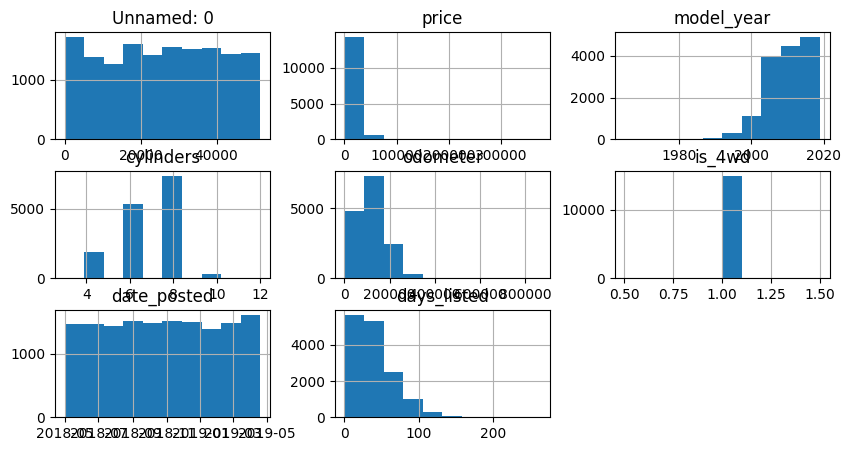

In [51]:

df.hist(figsize=(10,5))

In [52]:
#sns.boxplot(x=df['price'])



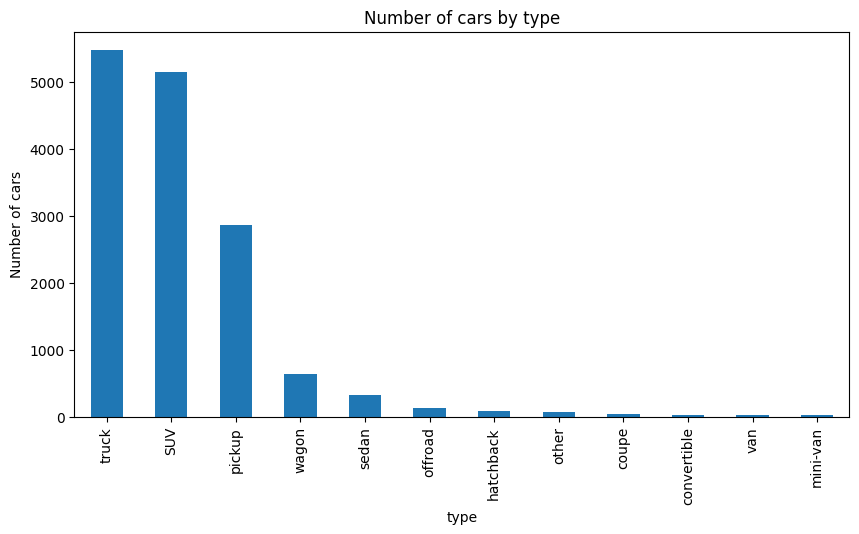

In [53]:
# Plotting a Histogram for number of cars per type
df.type.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by type")
plt.ylabel("Number of cars")
plt.xlabel("type");

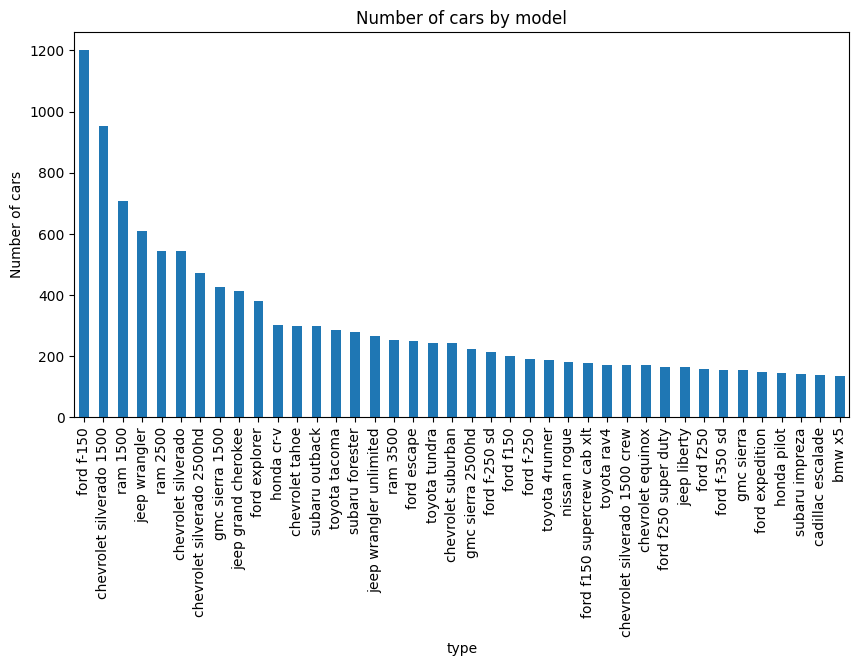

In [54]:
# Plotting a Histogram for number of cars per model
df.model.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by model")
plt.ylabel("Number of cars")
plt.xlabel("type");

In [55]:
fig4 = px.scatter(
    df,
    x='price',
    y="model",
    title="<b>Price distribution of the model</b>",    
)
fig4.show()

# project description Create a site that allow  to analysis car sales for vary of conditions 

 # objective analysis the car sales by the vary of conditions 

#  conclusion The graph show the biggest factor in car sales is mileage. the average sale of the cars is $15446. The total amount of vehicles sold is 14852

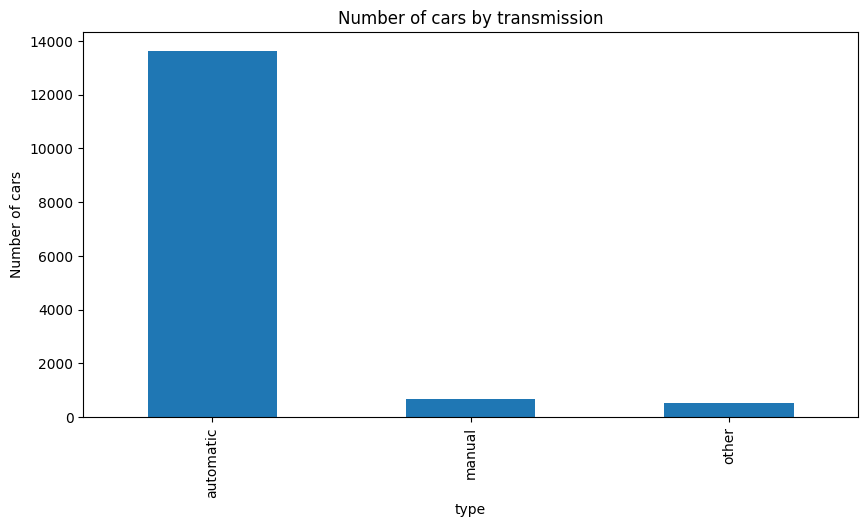

In [56]:
# Plotting a Histogram for number of cars per transmission
df.transmission.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by transmission")
plt.ylabel("Number of cars")
plt.xlabel("type");


In [57]:
# Find the relations between the variables.
plt.figure(figsize=(20,10))
corr = df.corr()
#sns.heatmap(corr,cmap="BrBG",annot=True)
corr

C:\Users\enhan\AppData\Local\Temp\ipykernel_3804\16890109.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Unnamed: 0,price,model_year,cylinders,odometer,is_4wd,days_listed
Unnamed: 0,1.000000,-0.014048,-0.038093,-0.004176,0.043986,NaN,0.007053
price,-0.014048,1.000000,0.570872,0.142674,-0.470753,NaN,-0.008667
model_year,-0.038093,0.570872,1.000000,-0.062516,-0.599515,NaN,-0.006680
cylinders,-0.004176,0.142674,-0.062516,1.000000,0.072150,NaN,-0.001291
odometer,0.043986,-0.470753,-0.599515,0.072150,1.000000,NaN,0.011420
is_4wd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days_listed,0.007053,-0.008667,-0.006680,-0.001291,0.011420,NaN,1.000000


<Figure size 2000x1000 with 0 Axes>

In [58]:
cat_totals = df.groupby("transmission")["price"].sum().sort_values()


In [59]:
print(cat_totals)

transmission
manual         7780207
other          8413328
automatic    213224138
Name: price, dtype: int64


In [60]:
cat_totals_condition = df.groupby("condition")["price"].sum().sort_values()


In [61]:
print(cat_totals_condition )

condition
salvage         121875
new            1660439
fair           1741778
like new      29162544
good          76310562
excellent    120420475
Name: price, dtype: int64


<Axes: ylabel='condition'>

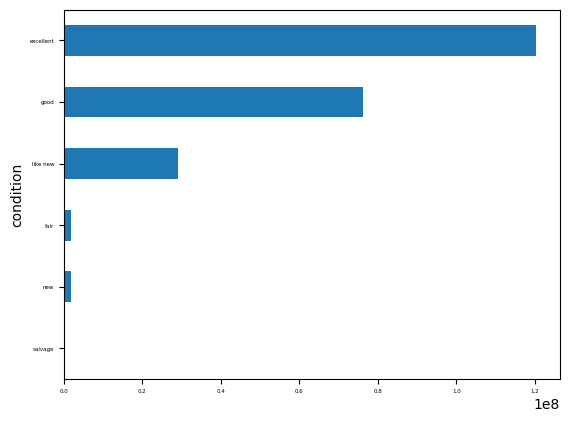

In [62]:
cat_totals_condition.plot(kind="barh", fontsize=4)

In [63]:
cat_totals_fuel = df.groupby("fuel")["price"].sum().sort_values()


<Axes: xlabel='fuel'>

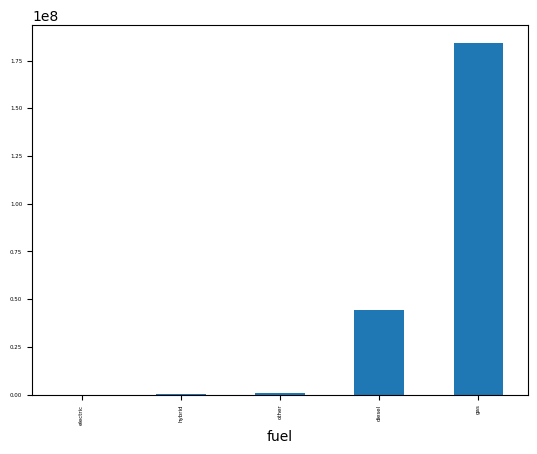

In [64]:
cat_totals_fuel.plot(kind="bar", fontsize=4)